<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Data_description_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [282]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [283]:
import pandas as pd

url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/data_2020.xlsx?raw=true'
df_2020 = pd.read_excel(url)



##Data Description 2020

In [284]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2145 non-null   int64  
 1   p_infrastructure       2145 non-null   float64
 2   p_forested             2145 non-null   float64
 3   p_agriculture          2145 non-null   float64
 4   p_improductible        2145 non-null   float64
 5   surface_polygone       2145 non-null   float64
 6   natural_growth_1000    2145 non-null   float64
 7   density                2145 non-null   float64
 8   dependency_ratio       2145 non-null   float64
 9   migration_intern       2145 non-null   float64
 10  migration              2145 non-null   float64
 11  p_employment           2145 non-null   float64
 12  primary_sector         2145 non-null   float64
 13  secondary_sector       2145 non-null   float64
 14  tertiary_sector        2145 non-null   float64
 15  p_so

Rename some spelling errors columns

In [285]:
df_2020 = df_2020.rename(columns={'p_improductible': 'p_unproductive'})
df_2020 = df_2020.rename(columns={'p_new_entreprise': 'p_new_enterprise'})

In [286]:
df_2020.describe()

,ID,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,...,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,3289.818182,0.158968,0.326205,0.449217,0.065521,1856.974168,0.654317,444.820686,67.176986,4.048122,...,17.147792,59.415219,3987.226527,20.376726,19.610593,0.429263,0.579187,109.141118,37811.926677,4.364536
std,2133.934762,0.153436,0.160898,0.191230,0.139096,3378.290930,6.082067,801.936889,9.242258,20.765305,...,9.707020,13.593901,12948.907725,3.328135,4.377195,0.208710,0.230824,182.736145,15409.772494,3.856459
min,1.000000,0.001505,0.000000,0.000000,0.000000,31.000000,-43.243243,0.825294,31.481481,-125.786164,...,0.000000,0.000000,32.000000,2.040816,5.808477,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1067.000000,0.062319,0.207513,0.319037,0.003188,442.000000,-2.171995,82.336957,61.338532,-7.159214,...,9.735531,51.461988,740.000000,18.614389,16.595451,0.266845,0.408319,28.730000,30788.931771,1.981132
50%,3296.000000,0.108153,0.312115,0.469442,0.010854,832.000000,0.886525,189.460784,66.348449,2.574949,...,15.432099,61.538462,1600.000000,20.527091,19.163410,0.417888,0.617521,60.990000,34960.337178,3.245943
75%,5411.000000,0.204301,0.426199,0.597001,0.047372,1681.000000,3.957457,480.884676,72.040816,13.533671,...,23.486842,68.929198,3913.000000,22.377622,21.951220,0.591635,0.781933,131.380000,40433.462867,5.447471
max,6810.000000,0.983051,0.893204,0.916667,0.949424,43861.000000,38.834951,12796.986817,168.750000,154.838710,...,58.810409,96.153846,421878.000000,37.209302,40.666667,1.000000,1.000000,4829.330000,452632.653061,46.100917


In [287]:
w_pop = df_2020.iloc[:, 22].tolist()  # the column of the population

w_surf = df_2020.iloc[:, 27].tolist() # the column of the surface

In [288]:
print(df_2020.columns)

Index(['ID', 'p_infrastructure', 'p_forested', 'p_agriculture',
       'p_unproductive', 'surface_polygone', 'natural_growth_1000', 'density',
       'dependency_ratio', 'migration_intern', 'migration', 'p_employment',
       'primary_sector', 'secondary_sector', 'tertiary_sector',
       'p_social_assistance', 'p_new_buildings', 'p_new_housings', 'p_cinema',
       'p_museum', 'p_culture_institution', 'size_households',
       'p_new_enterprise', 'p_weddings', 'p_foreigners', 'p_individual_houses',
       'Population', 'p_pop_19', 'p_pop_65', 'lat', 'long', 'zab_2022',
       'net_income_h', 'p_transport'],
      dtype='object')


In [289]:
df_2020.head()

,ID,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
0,3,0.177658,0.286676,0.526245,0.010767,743.0,4.650331,755.047106,68.620379,-0.536577,...,17.308378,71.557156,5610.0,21.922406,14.136126,0.565600,0.756055,92.40,45237.221823,5.107527
1,27,0.435484,0.447581,0.104839,0.020161,248.0,-0.547121,1490.725806,59.974037,15.592942,...,23.262104,61.704835,3697.0,26.069246,14.460285,0.605342,0.945369,113.23,39810.819037,10.800000
2,29,0.227273,0.561983,0.165289,0.037190,242.0,7.263123,641.322314,62.343096,9.904259,...,17.396907,70.833333,1552.0,25.307125,14.987715,0.602022,0.943557,46.35,51245.633040,6.666667
3,52,0.315615,0.306755,0.369878,0.006645,903.0,3.621358,1320.487265,59.989266,-2.610746,...,25.226434,58.082497,11924.0,31.192661,11.009174,0.601838,0.820014,230.67,40517.938092,8.758315
4,61,0.238289,0.334012,0.405295,0.022403,491.0,3.766478,217.311609,69.904459,10.357815,...,11.059044,77.094972,1067.0,21.890547,16.915423,0.571598,0.896693,45.26,43108.514664,5.295316


In [290]:
df_ID =  df_2020.iloc[:,0]
df_2020 =  df_2020.iloc[:,1:]
df_2020

,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
0,0.177658,0.286676,0.526245,0.010767,743.0,4.650331,755.047106,68.620379,-0.536577,1.073153,...,17.308378,71.557156,5610.0,21.922406,14.136126,0.565600,0.756055,92.40,45237.221823,5.107527
1,0.435484,0.447581,0.104839,0.020161,248.0,-0.547121,1490.725806,59.974037,15.592942,7.933251,...,23.262104,61.704835,3697.0,26.069246,14.460285,0.605342,0.945369,113.23,39810.819037,10.800000
2,0.227273,0.561983,0.165289,0.037190,242.0,7.263123,641.322314,62.343096,9.904259,24.430505,...,17.396907,70.833333,1552.0,25.307125,14.987715,0.602022,0.943557,46.35,51245.633040,6.666667
3,0.315615,0.306755,0.369878,0.006645,903.0,3.621358,1320.487265,59.989266,-2.610746,7.074280,...,25.226434,58.082497,11924.0,31.192661,11.009174,0.601838,0.820014,230.67,40517.938092,8.758315
4,0.238289,0.334012,0.405295,0.022403,491.0,3.766478,217.311609,69.904459,10.357815,-3.766478,...,11.059044,77.094972,1067.0,21.890547,16.915423,0.571598,0.896693,45.26,43108.514664,5.295316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.043401,0.452613,0.469442,0.033658,1129.0,0.000000,90.611160,62.639110,21.749876,0.988631,...,7.135875,49.185668,1023.0,20.930233,15.697674,0.372765,0.435282,24.12,30363.800000,1.418440
2141,0.075801,0.207293,0.714254,0.003978,4525.0,2.129623,155.602210,64.279048,-5.537020,2.981472,...,9.955972,37.151248,7041.0,14.666667,12.000000,0.492136,0.632730,148.00,30680.513767,2.096667
2142,0.068724,0.417952,0.485273,0.021038,713.0,-2.884615,145.021038,59.567901,-9.615385,-1.923077,...,7.930368,69.184290,1034.0,4.761905,28.571429,0.786334,0.832709,28.49,38328.871893,1.977401
2143,0.160976,0.294309,0.507317,0.026016,615.0,4.226840,465.528455,61.477721,34.166960,-7.396971,...,17.394342,76.566757,2863.0,8.791209,29.670330,0.526325,0.787867,85.39,37962.415631,3.453947


In [291]:
df_ID 

0          3
1         27
2         29
3         52
4         61
        ... 
2140     767
2141    1098
2142    3219
2143    4072
2144    5530
Name: ID, Length: 2145, dtype: int64

Replace the outliers by the median

In [292]:
# calculate the boundaries
#lower_bound = df_2020.mean() - 3 * df_2020.std()
#upper_bound = df_2020.mean() + 3 * df_2020.std()

# replace the outliers by the median
#for column in df_2020.columns:
#    median = df_2020[column].median()
#    df_2020.loc[df_2020[column] < lower_bound[column], column] = median
#    df_2020.loc[df_2020[column] > upper_bound[column], column] = median


In [293]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020

scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)

df_2020 = pd.DataFrame(data=stdf_2020, columns=df_2020.columns)
df_2020['ID'] = df_ID


Change some data with a log

In [294]:
df_2020['p_employment'] = np.log(df_2020['p_employment'])
df_2020['primary_sector'] = np.log(df_2020['primary_sector'])
df_2020['secondary_sector'] = np.log(df_2020['secondary_sector'])
df_2020

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,...,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport,ID
0,0.121841,-0.245738,0.402897,-0.393734,-0.329822,0.657169,0.386937,0.156210,-0.220838,-0.368059,...,0.893398,0.125350,0.464537,-1.250971,0.653389,0.766425,-0.091635,0.481969,0.192706,3
1,1.802583,0.754537,-1.801276,-0.326181,-0.476380,-0.197584,1.304528,-0.779531,0.556096,0.416991,...,0.168469,-0.022418,1.710823,-1.176897,0.843851,1.586786,0.022381,0.129746,1.669138,27
2,0.445274,1.465728,-1.485088,-0.203727,-0.478156,1.086859,0.245091,-0.523142,0.282081,2.304888,...,0.840140,-0.188108,1.481776,-1.056374,0.827938,1.578933,-0.343696,0.871969,0.597094,29
3,1.021167,-0.120912,-0.414982,-0.423379,-0.282450,0.487948,1.092194,-0.777883,-0.320748,0.318693,...,-0.098061,0.613073,3.250606,-1.965511,0.827060,1.043581,0.665206,0.175645,1.139595,52
4,0.517090,0.048533,-0.229732,-0.310059,-0.404433,0.511814,-0.283766,0.295178,0.303928,-0.921892,...,1.300868,-0.225572,0.454962,-0.615873,0.682132,1.375857,-0.349663,0.343796,0.241412,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,-0.753367,0.785820,0.105788,-0.229126,-0.215536,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,...,-0.752686,-0.228970,0.166350,-0.894141,-0.270769,-0.623588,-0.465376,-0.483451,-0.764116,767
2141,-0.542155,-0.739225,1.386283,-0.442555,0.789940,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,...,-1.638173,0.235888,-1.716093,-1.739097,0.301317,0.232021,0.212700,-0.462893,-0.588207,1098
2142,-0.588292,0.570351,0.188595,-0.319877,-0.338704,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,...,0.718804,-0.228121,-4.692857,2.047641,1.711248,1.098594,-0.441456,0.033554,-0.619141,3219
2143,0.013089,-0.198285,0.303895,-0.284078,-0.367720,0.587523,0.025828,-0.616797,1.450779,-1.337355,...,1.262003,-0.086840,-3.481896,2.298751,0.465163,0.904280,-0.130005,0.009768,-0.236176,4072


##Description of the correlations for 2020

In [295]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()

Correlation matrix

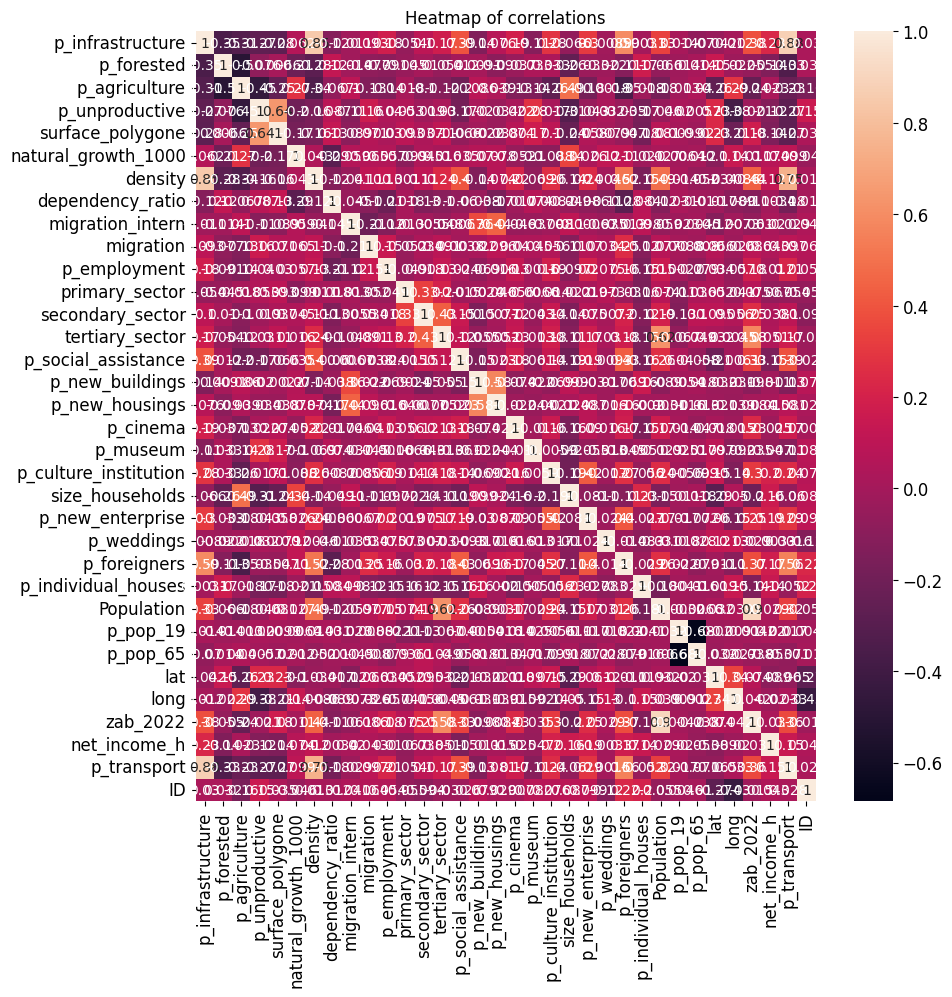

In [296]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (30,50)
plt.show()


Principal component Analysis => cf code in R

After the dimensionality reduction

In [297]:
df_2020.drop('tertiary_sector', axis=1, inplace=True)
df_2020.drop('p_infrastructure', axis=1, inplace=True)
df_2020.drop('p_pop_65', axis=1, inplace=True)
df_2020.drop('p_cinema', axis=1, inplace=True)
df_2020.drop('p_museum', axis=1, inplace=True)
df_2020.drop('lat', axis=1, inplace=True)
df_2020.drop('long', axis=1, inplace=True)

df_2020.to_csv('data_scaled_2020.csv', index = False, sep=',')
df_2020

,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,p_employment,...,p_new_enterprise,p_weddings,p_foreigners,p_individual_houses,Population,p_pop_19,zab_2022,net_income_h,p_transport,ID
0,-0.245738,0.402897,-0.393734,-0.329822,0.657169,0.386937,0.156210,-0.220838,-0.368059,NaN,...,-0.087325,0.339855,0.016547,0.893398,0.125350,0.464537,-0.091635,0.481969,0.192706,3
1,0.754537,-1.801276,-0.326181,-0.476380,-0.197584,1.304528,-0.779531,0.556096,0.416991,NaN,...,0.019914,0.339937,0.630033,0.168469,-0.022418,1.710823,0.022381,0.129746,1.669138,27
2,1.465728,-1.485088,-0.203727,-0.478156,1.086859,0.245091,-0.523142,0.282081,2.304888,NaN,...,-1.038080,0.050495,0.025669,0.840140,-0.188108,1.481776,-0.343696,0.871969,0.597094,29
3,-0.120912,-0.414982,-0.423379,-0.282450,0.487948,1.092194,-0.777883,-0.320748,0.318693,-1.840879,...,0.274032,0.473692,0.832441,-0.098061,0.613073,3.250606,0.665206,0.175645,1.139595,52
4,0.048533,-0.229732,-0.310059,-0.404433,0.511814,-0.283766,0.295178,0.303928,-0.921892,NaN,...,1.627954,-0.031538,-0.627398,1.300868,-0.225572,0.454962,-0.349663,0.343796,0.241412,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.215536,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,NaN,...,-1.038080,-0.783364,-1.031650,-0.752686,-0.228970,0.166350,-0.465376,-0.483451,-0.764116,767
2141,-0.739225,1.386283,-0.442555,0.789940,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,-2.644188,...,-0.533064,0.115864,-0.741061,-1.638173,0.235888,-1.716093,0.212700,-0.462893,-0.588207,1098
2142,0.570351,0.188595,-0.319877,-0.338704,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,NaN,...,0.681370,1.214052,-0.949784,0.718804,-0.228121,-4.692857,-0.441456,0.033554,-0.619141,3219
2143,-0.198285,0.303895,-0.284078,-0.367720,0.587523,0.025828,-0.616797,1.450779,-1.337355,-1.108719,...,-0.168686,-0.134113,0.025405,1.262003,-0.086840,-3.481896,-0.130005,0.009768,-0.236176,4072


##Number of clusters

delete the weights

In [298]:
df_2020.drop('Population', axis=1, inplace=True)
df_2020.drop('surface_polygone', axis=1, inplace=True)
df_2020.drop('ID', axis=1, inplace=True)

Silhouette score

set up to do a K-Means analysis

In [299]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data preprocessing and standardization

In [300]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020

scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)

df_2020 = pd.DataFrame(stdf_2020)
print(df_2020)

            0         1         2         3         4         5         6   \
0    -0.245738  0.402897 -0.393734  0.657169  0.386937  0.156210 -0.220838   
1     0.754537 -1.801276 -0.326181 -0.197584  1.304528 -0.779531  0.556096   
2     1.465728 -1.485088 -0.203727  1.086859  0.245091 -0.523142  0.282081   
3    -0.120912 -0.414982 -0.423379  0.487948  1.092194 -0.777883 -0.320748   
4     0.048533 -0.229732 -0.310059  0.511814 -0.283766  0.295178  0.303928   
...        ...       ...       ...       ...       ...       ...       ...   
2140  0.785820  0.105788 -0.229126 -0.107607 -0.441796 -0.491107  0.852667   
2141 -0.739225  1.386283 -0.442555  0.242623 -0.360734 -0.313626 -0.461702   
2142  0.570351  0.188595 -0.319877 -0.581999 -0.373932 -0.823485 -0.658150   
2143 -0.198285  0.303895 -0.284078  0.587523  0.025828 -0.616797  1.450779   
2144 -0.896610  1.512063 -0.446234  1.638830 -0.432031 -0.479028 -0.536008   

            7         8   9   ...        14        15        16

Determination of the parameters and the number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

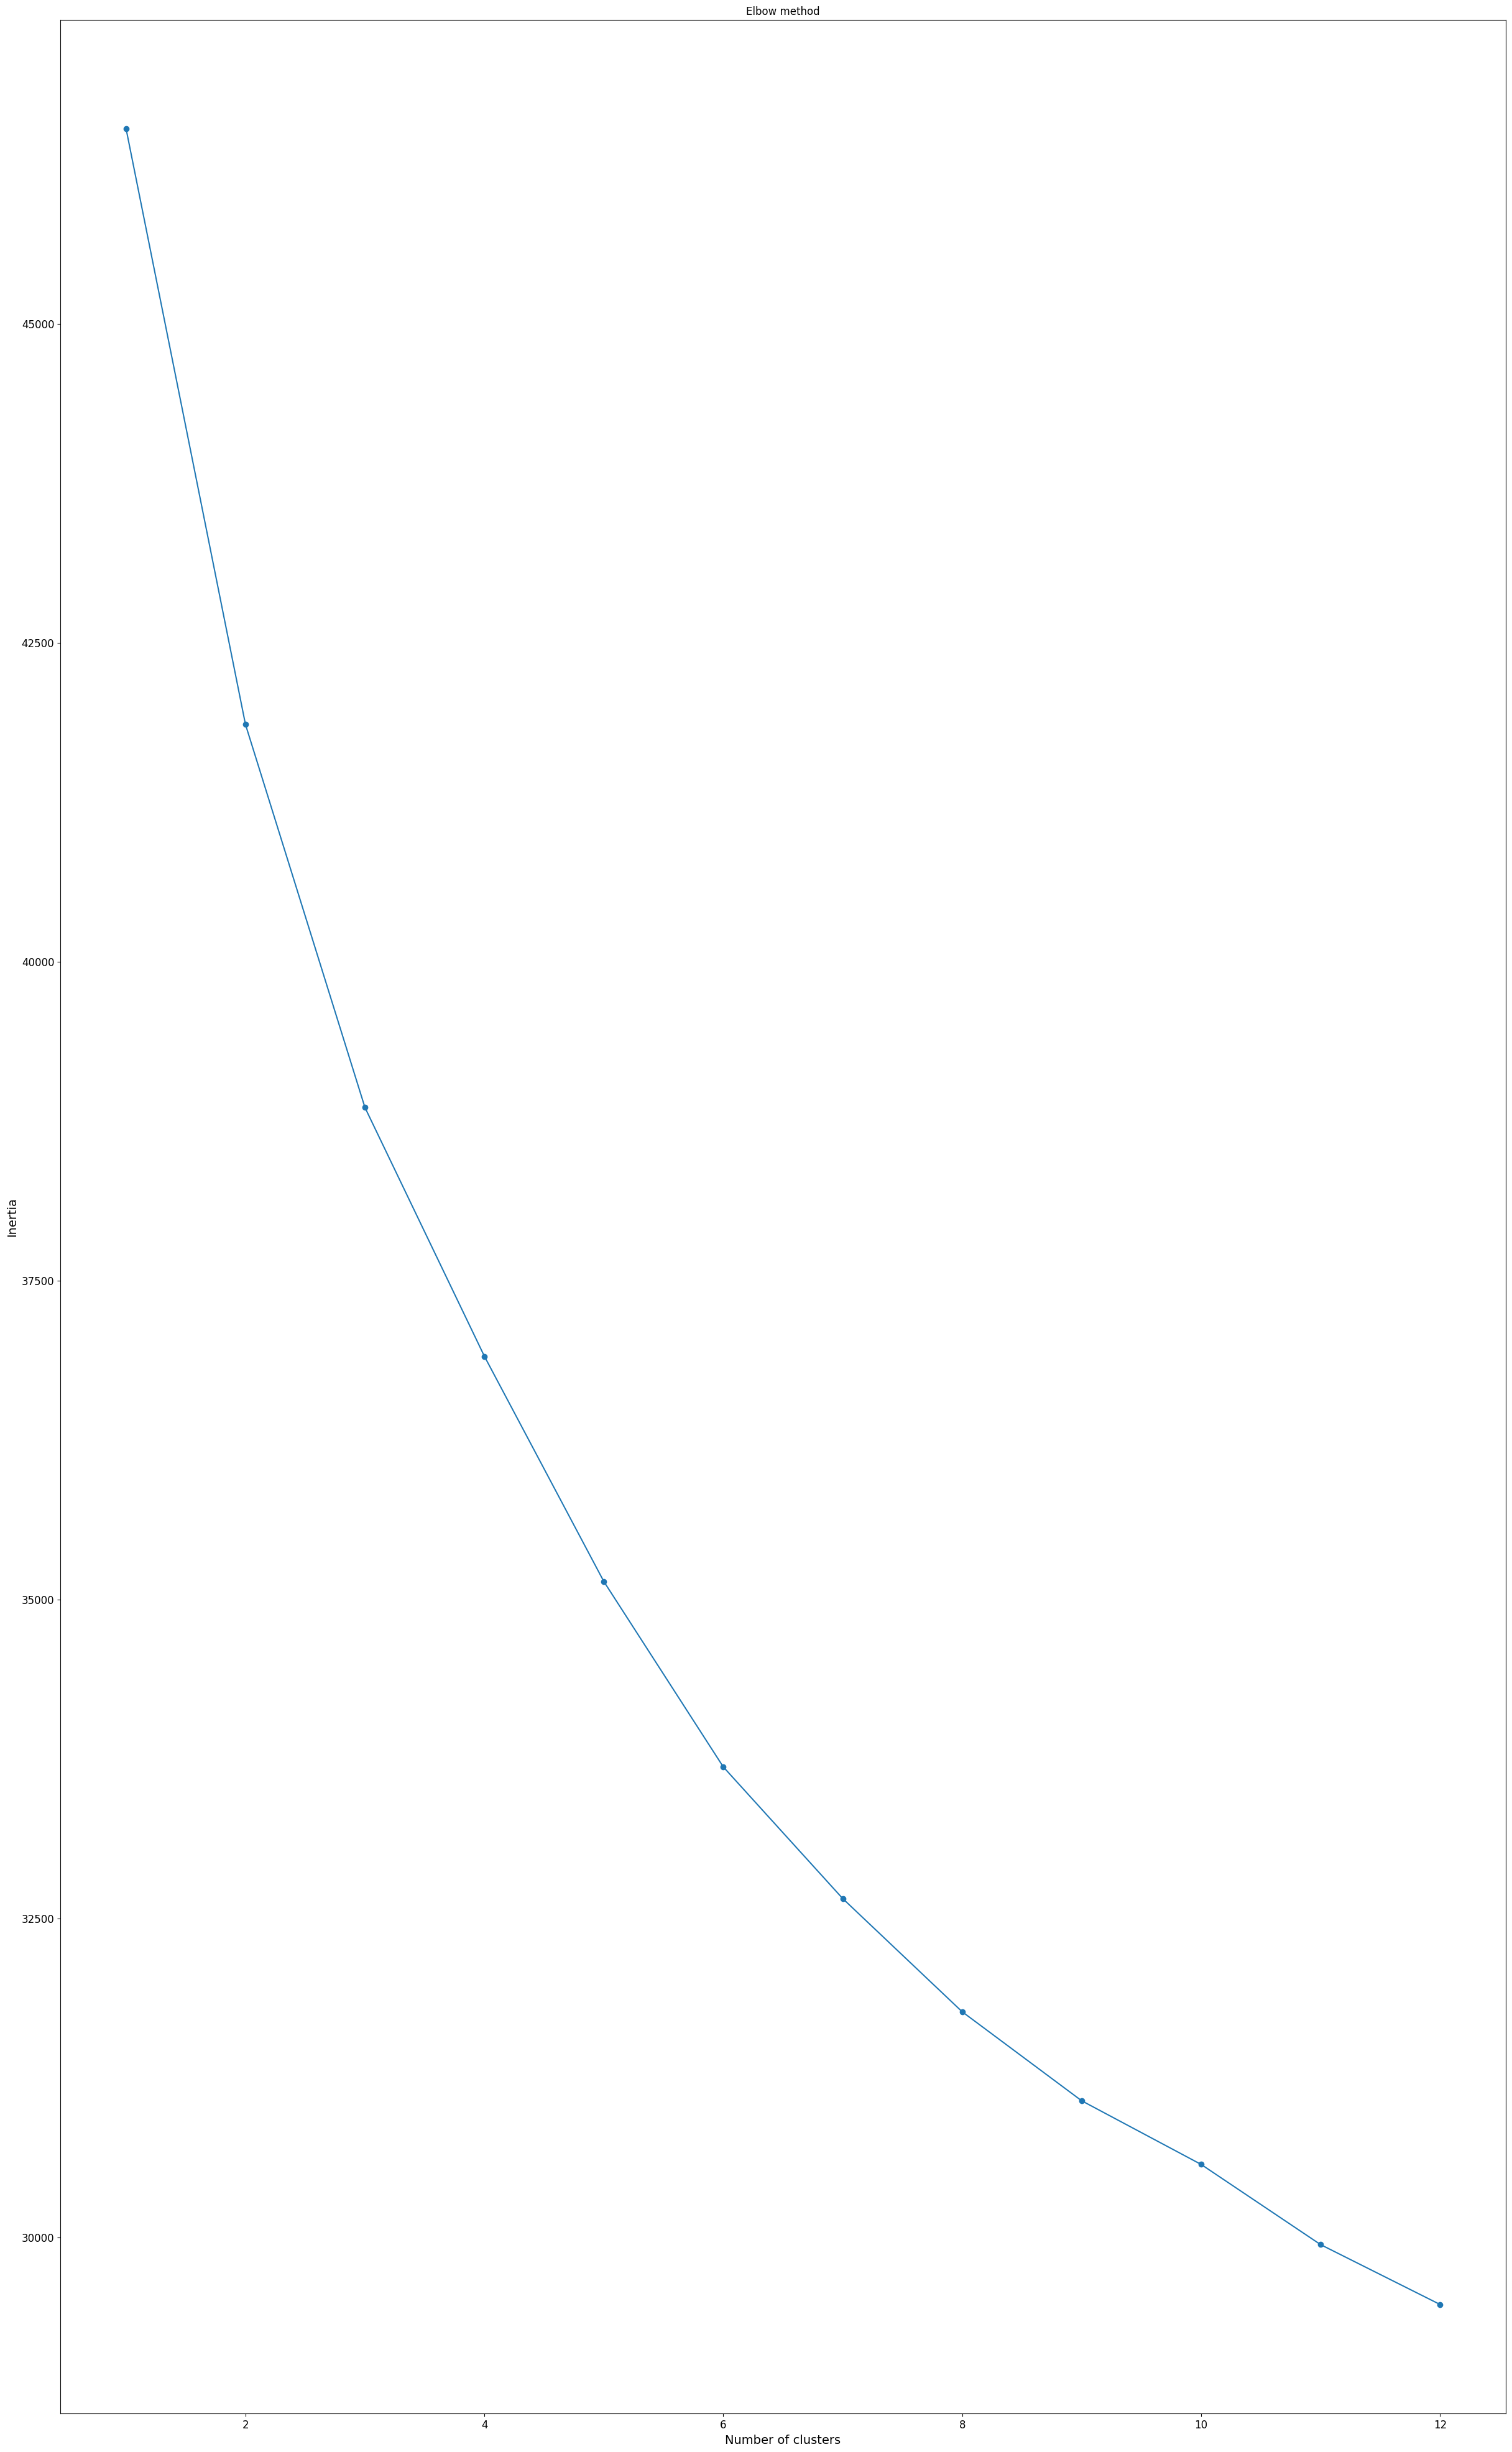

In [301]:
from sklearn.cluster import KMeans

df_2020 = np.nan_to_num(df_2020, nan=0)

inertias = []

for i in range(1,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [302]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(df_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(df_2020, cluster_labels))
silhouette_ann

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.15498951702697386,
 0.11902491626189869,
 0.14073573798537461,
 0.08890502853710695,
 0.07956766062023199,
 0.07404512201245961,
 0.07434433396550297,
 0.07407968184090098]

In [303]:
num_clusters

9

In [304]:
Ncluster = range(1,num_clusters)
Ncluster
silhouette_ann

[0.15498951702697386,
 0.11902491626189869,
 0.14073573798537461,
 0.08890502853710695,
 0.07956766062023199,
 0.07404512201245961,
 0.07434433396550297,
 0.07407968184090098]

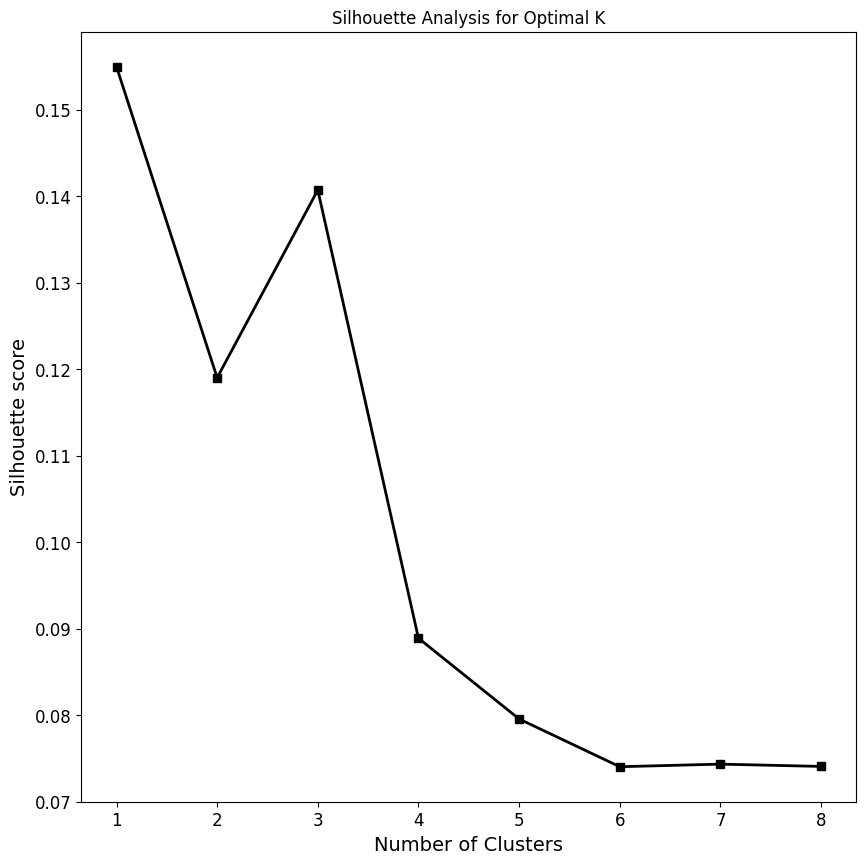

In [305]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [306]:
df_2020 = pd.DataFrame(df_2020)

In [307]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,0.000000,0.0,...,0.364846,0.342743,-0.087325,0.339855,0.016547,0.893398,0.464537,-0.091635,0.481969,0.192706
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,0.000000,0.0,...,-0.671572,-0.672128,0.019914,0.339937,0.630033,0.168469,1.710823,0.022381,0.129746,1.669138
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,0.000000,0.0,...,0.008356,-0.011751,-1.038080,0.050495,0.025669,0.840140,1.481776,-0.343696,0.871969,0.597094
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,-0.673005,0.0,...,-0.182980,0.145287,0.274032,0.473692,0.832441,-0.098061,3.250606,0.665206,0.175645,1.139595
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,0.000000,0.0,...,0.297523,0.723135,1.627954,-0.031538,-0.627398,1.300868,0.454962,-0.349663,0.343796,0.241412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,0.000000,0.0,...,-1.163529,-0.784407,-1.038080,-0.783364,-1.031650,-0.752686,0.166350,-0.465376,-0.483451,-0.764116
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,-1.265565,0.0,...,0.238730,0.772904,-0.533064,0.115864,-0.741061,-1.638173,-1.716093,0.212700,-0.462893,-0.588207
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,0.000000,0.0,...,0.595433,1.396111,0.681370,1.214052,-0.949784,0.718804,-4.692857,-0.441456,0.033554,-0.619141
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,-0.132927,0.0,...,0.107003,0.583969,-0.168686,-0.134113,0.025405,1.262003,-3.481896,-0.130005,0.009768,-0.236176


Implement a weighted K-means


In [308]:
df_2020_K = df_2020

1. K-means without weight

In [309]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_2020)
print(kmeans)

y_kmean_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [310]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,0.000000,0.0,...,0.364846,0.342743,-0.087325,0.339855,0.016547,0.893398,0.464537,-0.091635,0.481969,0.192706
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,0.000000,0.0,...,-0.671572,-0.672128,0.019914,0.339937,0.630033,0.168469,1.710823,0.022381,0.129746,1.669138
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,0.000000,0.0,...,0.008356,-0.011751,-1.038080,0.050495,0.025669,0.840140,1.481776,-0.343696,0.871969,0.597094
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,-0.673005,0.0,...,-0.182980,0.145287,0.274032,0.473692,0.832441,-0.098061,3.250606,0.665206,0.175645,1.139595
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,0.000000,0.0,...,0.297523,0.723135,1.627954,-0.031538,-0.627398,1.300868,0.454962,-0.349663,0.343796,0.241412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,0.000000,0.0,...,-1.163529,-0.784407,-1.038080,-0.783364,-1.031650,-0.752686,0.166350,-0.465376,-0.483451,-0.764116
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,-1.265565,0.0,...,0.238730,0.772904,-0.533064,0.115864,-0.741061,-1.638173,-1.716093,0.212700,-0.462893,-0.588207
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,0.000000,0.0,...,0.595433,1.396111,0.681370,1.214052,-0.949784,0.718804,-4.692857,-0.441456,0.033554,-0.619141
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,-0.132927,0.0,...,0.107003,0.583969,-0.168686,-0.134113,0.025405,1.262003,-3.481896,-0.130005,0.009768,-0.236176


In [311]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_2020)
y_kmean_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. K-Means avec weighted pop

In [312]:
kmeans = KMeans(n_clusters=3)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [313]:
kmeans = KMeans(n_clusters=7)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3. K-Means with weight on the surface

In [314]:
kmeans = KMeans(n_clusters=3)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
print(kmeans)
y_kmean_surf_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [315]:
kmeans = KMeans(n_clusters=7)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_surf_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [316]:
df_2020['cluster_3']= y_kmean_3
df_2020['cluster_7']= y_kmean_7
df_2020['cluster_pop_3']= y_kmean_pop_3
df_2020['cluster_pop_7']= y_kmean_pop_7
df_2020['cluster_surf_3']= y_kmean_surf_3
df_2020['cluster_surf_7']= y_kmean_surf_7

In [317]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,0.000000,0.0,...,0.464537,-0.091635,0.481969,0.192706,2,2,2,0,2,4
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,0.000000,0.0,...,1.710823,0.022381,0.129746,1.669138,1,1,1,1,1,6
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,0.000000,0.0,...,1.481776,-0.343696,0.871969,0.597094,0,4,1,5,1,2
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,-0.673005,0.0,...,3.250606,0.665206,0.175645,1.139595,1,1,2,1,2,6
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,0.000000,0.0,...,0.454962,-0.349663,0.343796,0.241412,2,2,2,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,0.000000,0.0,...,0.166350,-0.465376,-0.483451,-0.764116,2,0,2,0,2,2
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,-1.265565,0.0,...,-1.716093,0.212700,-0.462893,-0.588207,2,2,2,0,2,4
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,0.000000,0.0,...,-4.692857,-0.441456,0.033554,-0.619141,2,2,2,0,2,4
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,-0.132927,0.0,...,-3.481896,-0.130005,0.009768,-0.236176,2,2,2,0,2,4


3. Kmeans en fonction du PCA

1. importer les valeurs 


In [318]:
url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/PCA_data_2020.xlsx?raw=true'
df_2020_pca = pd.read_excel(url)

In [319]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stdf_2020_pca = scaler.fit_transform(df_2020_pca)

df_2020_pca = pd.DataFrame(data=stdf_2020_pca, columns=df_2020_pca.columns)

In [320]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca = kmeans_pca.predict(df_2020_pca)

weights = w_pop
kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca_pop = kmeans_pca.predict(df_2020_pca,sample_weight = w_pop)

weights = w_surf
kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca_surf = kmeans_pca.predict(df_2020_pca,sample_weight = w_surf)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [321]:
df_2020['pca_cluster']= y_kmean_pca
df_2020['pca_surf']= y_kmean_pca_surf
df_2020['pca_pop']= y_kmean_pca_pop
df_2020

,0,1,2,3,4,5,6,7,8,9,...,23,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7,pca_cluster,pca_surf,pca_pop
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,0.000000,0.0,...,0.192706,2,2,2,0,2,4,0,1,3
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,0.000000,0.0,...,1.669138,1,1,1,1,1,6,0,1,3
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,0.000000,0.0,...,0.597094,0,4,1,5,1,2,0,1,3
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,-0.673005,0.0,...,1.139595,1,1,2,1,2,6,0,1,3
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,0.000000,0.0,...,0.241412,2,2,2,0,2,4,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,0.000000,0.0,...,-0.764116,2,0,2,0,2,2,2,6,5
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,-1.265565,0.0,...,-0.588207,2,2,2,0,2,4,2,6,5
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,0.000000,0.0,...,-0.619141,2,2,2,0,2,4,4,3,0
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,-0.132927,0.0,...,-0.236176,2,2,2,0,2,4,4,3,0


In [322]:
df_2020['ID'] = df_ID
df_2020.to_csv('data_kmeansweighted.csv', index = False, sep=',')


In [323]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7,pca_cluster,pca_surf,pca_pop,ID
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,0.000000,0.0,...,2,2,2,0,2,4,0,1,3,3
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,0.000000,0.0,...,1,1,1,1,1,6,0,1,3,27
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,0.000000,0.0,...,0,4,1,5,1,2,0,1,3,29
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,-0.673005,0.0,...,1,1,2,1,2,6,0,1,3,52
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,0.000000,0.0,...,2,2,2,0,2,4,0,1,3,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,0.000000,0.0,...,2,0,2,0,2,2,2,6,5,767
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,-1.265565,0.0,...,2,2,2,0,2,4,2,6,5,1098
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,0.000000,0.0,...,2,2,2,0,2,4,4,3,0,3219
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,-0.132927,0.0,...,2,2,2,0,2,4,4,3,0,4072
